<a href="https://colab.research.google.com/github/3B032070/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3: Fashion MNIST 分類作業

a. 資料預處理

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
訓練資料形狀: (60000, 28, 28)
測試資料形狀: (10000, 28, 28)


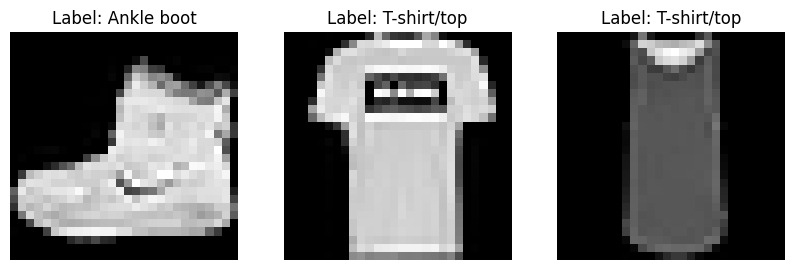

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 標籤對照表（課本 p.2-46）
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 載入資料
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("訓練資料形狀:", x_train.shape)
print("測試資料形狀:", x_test.shape)

# 正規化
x_train = x_train / 255.0
x_test = x_test / 255.0

# 展平圖片
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# One-hot 編碼
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 顯示三張訓練圖片及其標籤
plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {label_names[y_train[i]]}")
    plt.axis('off')
plt.show()



## 二、模型設計
b. 建立神經網路模型


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


## 三、模型訓練與驗證
c. 訓練神經網路模型（含 20% 驗證集）

In [ ]:
#訓練
history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7358 - loss: 0.7749 - val_accuracy: 0.8493 - val_loss: 0.4235
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8552 - loss: 0.4093 - val_accuracy: 0.8393 - val_loss: 0.4346
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8690 - loss: 0.3599 - val_accuracy: 0.8719 - val_loss: 0.3628
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8803 - loss: 0.3271 - val_accuracy: 0.8751 - val_loss: 0.3525
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8852 - loss: 0.3164 - val_accuracy: 0.8714 - val_loss: 0.3479
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8875 - loss: 0.3033 - val_accuracy: 0.8816 - val_loss: 0.3292
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8958 - loss: 0.2859 - val_accuracy: 0.8845 - val_loss: 0.3193
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8991 - loss: 0.2713 - val_accuracy: 0.


## 四、訓練結果圖表
d. 顯示 loss 與 accuracy 折線圖


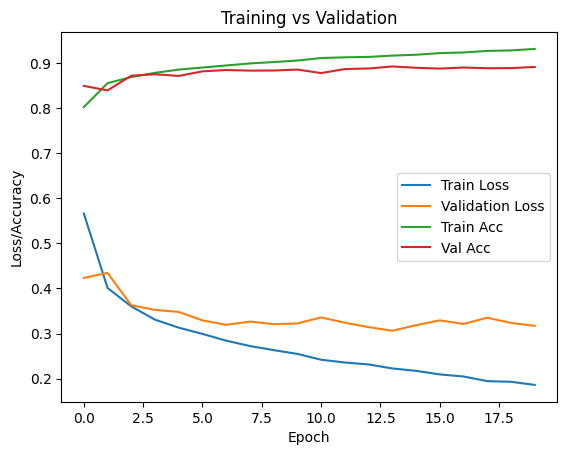

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Training vs Validation')
plt.show()


 e. 評估模型準確率

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"測試資料準確率: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8843 - loss: 0.3537
測試資料準確率: 0.8856


f. 測試預測結果（顯示圖片與標籤名）

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


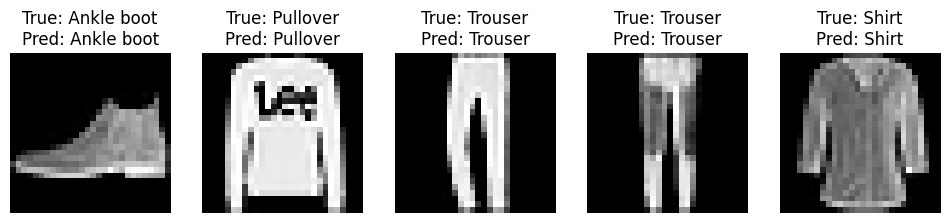

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# 顯示幾張圖片與預測結果
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {label_names[y_test[i]]}\nPred: {label_names[predicted_classes[i]]}")
    plt.axis('off')
plt.show()



## 五、測試集預測結果與混淆矩陣
使用測試資料進行預測，並畫出混淆矩陣分析分類效果。


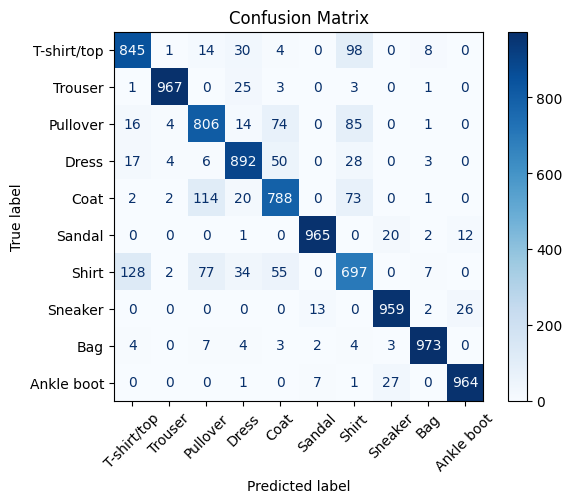

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


h. 儲存模型

In [ ]:
model.save("fashion_mnist_dnn_model.h5")
